# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [29]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [30]:
#Read in data from source 
admissions = pd.read_csv("C:/Users/ilybangi/Desktop/Python/CHI-DS-6-master/Unit Projects/Project_2/assets/admissions.csv")


In [31]:
##Taking a look at the columns of the data set

admissions.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

### Data Dictionary


Variable | Description | Type of Variable
---| ---| ---
Admit| Admission to School (0 = No 1= Yes) | Integer
GRE | GRE Test Score | Numerical
GPA| Students GPA | Numerical
Prestige | (Prestige) Rank of Students  | Categorical



## Questions
#### Question 1. How many observations are in our dataset? 


In [32]:
admissions.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### Answer: 

There are 400 total observations (admits) while the other variables (gre, gpa, and prestige) contain a few blank values

#### Question 2. Create a summary table

In [33]:
admissions.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [34]:
##Creating dummy variables for prestige
admission2 = admissions

In [35]:
rank_dummy = pd.get_dummies(admissions['prestige'])

In [36]:
rank_dummy

,1.0,2.0,3.0,4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,1,0,0


In [37]:
admission2=admission2.join(rank_dummy)

#### Question 3. Why would GRE have a larger STD than GPA?

In [38]:
admissions.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

#### Answer:

The range (min/max) of GRE scoring is significantly larger than that of the GPA scale. The GRE scores range from 220 to 800, whereas the GPA range from this data set range from 4.0 as the max and 2.26 as the minimum.


#### Question 4. Drop data points with missing data


In [39]:
admissions.dropna(how = "any", inplace = True)

In [40]:
admission2.dropna(how = "any", inplace = True)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [41]:
admissions.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [42]:
admission2.describe()

,admit,gre,gpa,prestige,1.0,2.0,3.0,4.0
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665,0.153652,0.372796,0.304786,0.168766
std,0.466044,115.717787,0.380208,0.947083,0.361070,0.484159,0.460898,0.375017
min,0.000000,220.000000,2.260000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.400000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,3.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
admissions.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [44]:
admission2.count()

admit       397
gre         397
gpa         397
prestige    397
1.0         397
2.0         397
3.0         397
4.0         397
dtype: int64

From the initial summary table, we could see ther were 400 line items in this data set (based on the admit column) after removing the null values, the admit column is down to 397 line items. This suggessts that those 3 line items that were missing a particular variable, are no longer part of this data set.

#### Question 6. Create box plots for GRE and GPA

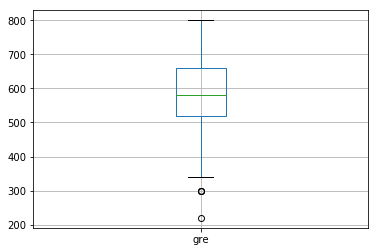

In [45]:
admissions.boxplot('gre')

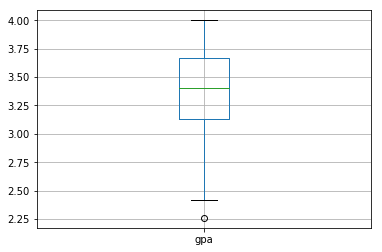

In [46]:
admissions.boxplot('gpa') 

#### Question 7. What do this plots show?

Answer: 

These boxplots show the range of where the data points fall. The min, max, and the median of the data. It also provides the IQR which would aid in helping identify the outliers.


#### Question 8. Describe each distribution 

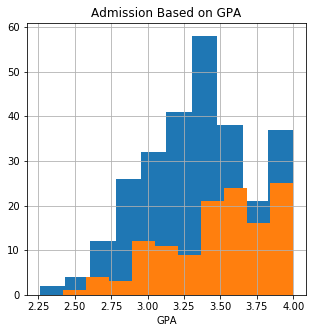

In [57]:
##Plotting histogram distribution of those admitted based on GPA
admissions.groupby('admit').gpa.hist()

plt.xlabel('GPA')
plt.title("Admission Based on GPA")

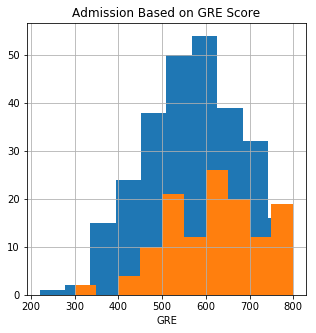

In [58]:
##Plotting histogram distribution of those admitted based on GRE score
admissions.groupby('admit').gre.hist()

plt.xlabel('GRE')
plt.title("Admission Based on GRE Score")

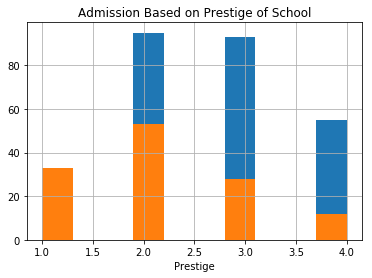

In [49]:
##Plotting histogram distribution of those admitted based on Prestige/Rank
admissions.groupby('admit').prestige.hist()

plt.xlabel('Prestige')
plt.title("Admission Based on Prestige of School")

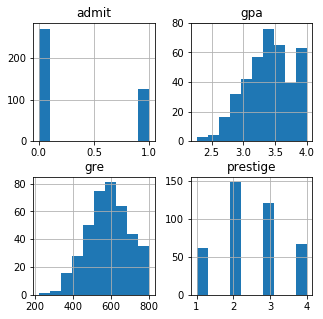

In [68]:
# bar plots of the variables
admissions.hist()
pl.show()

In [50]:
admissions.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


In [51]:
admission2.corr()

,admit,gre,gpa,prestige,1.0,2.0,3.0,4.0
admit,1.000000,0.181202,0.174116,-0.243563,0.204689,0.067459,-0.122302,-0.133859
gre,0.181202,1.000000,0.382408,-0.124533,0.088277,0.058454,-0.074380,-0.069046
gpa,0.174116,0.382408,1.000000,-0.060976,0.068304,-0.050507,0.070881,-0.087671
prestige,-0.243563,-0.124533,-0.060976,1.000000,-0.670582,-0.398292,0.357934,0.719947
1.0,0.204689,0.088277,0.068304,-0.670582,1.000000,-0.328493,-0.282120,-0.191989
2.0,0.067459,0.058454,-0.050507,-0.398292,-0.328493,1.000000,-0.510469,-0.347385
3.0,-0.122302,-0.074380,0.070881,0.357934,-0.282120,-0.510469,1.000000,-0.298345
4.0,-0.133859,-0.069046,-0.087671,0.719947,-0.191989,-0.347385,-0.298345,1.000000


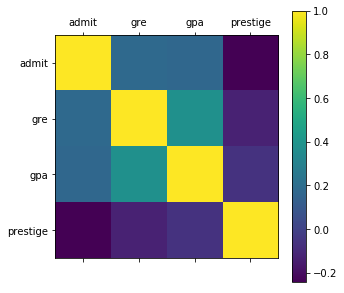

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(admissions.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(admissions.corr().index)))
ax.set_yticks(range(len(admissions.corr().index)))
ax.set_xticklabels(admissions.corr().index)
ax.set_yticklabels(admissions.corr().index)

plt.show()

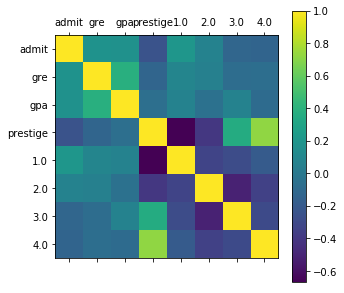

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(admission2.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(admission2.corr().index)))
ax.set_yticks(range(len(admission2.corr().index)))
ax.set_xticklabels(admission2.corr().index)
ax.set_yticklabels(admission2.corr().index)

plt.show()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: In terms of our three variable (GRE, GPA, Prestige) these distributions would not meet the requirement of a normal distribution. Both GRE and GPA are left skewed, suggesting the median is to the right of the mean.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

Answer: GRE and GPA have a moderate colinearity (.38 correlation), but compared against the other variables, these two contain the strongest correlation. 

#### Question 12. What did you find?

Answer: Those from a less prestigous school have a lower likelihood of getting accepted (negative correlation to admission). However, GRE and GPA contain higher correlations to admission levels, suggesting these two variables are more likely to influence admission.

In [65]:
# table showing # of admitted students by prestige/rank of school
print(pd.crosstab(admission2['admit'], admission2['prestige'], rownames=['admit']))



prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Those from a less prestigous school have a lower likelihood of getting accepted (negative correlation to admission). The correlation matrix with dummy variables clearly displays that as the prestige of the school decreases, admission correlation decreases (closer to negative). This is displayed with the matrix tiles getting darker as the prestige rank gets higher (1 being best 4 being worst).

In this case, the null hypothesis will be that there is no relationship between admission rates and prestige of undergraduate schools. The Chi Square Goodness of Fit test will hlep determine if the obsered frequency differes from the expected. Based on the data, if prestige of the undergraduate school is lower (2,3,or 4) the student has a lower chance of admission than students from schools with prestige of 1. Prestige 1 is used as the baseline data set in this case.



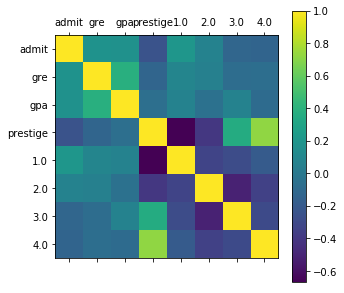

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 10


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(admission2.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(admission2.corr().index)))
ax.set_yticks(range(len(admission2.corr().index)))
ax.set_xticklabels(admission2.corr().index)
ax.set_yticklabels(admission2.corr().index)

plt.show()

#### Question 14. What is your hypothesis? 

Answer: 

Null Hypothesis: There is no relationship between School Prestige (rank) and Admission

Alternative: There is a relationship between School Prestige (rank) and Admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

replace null values with mean or median values



In [84]:
admissions3 = pd.read_csv("C:/Users/ilybangi/Desktop/Python/CHI-DS-6-master/Unit Projects/Project_2/assets/admissions.csv")


In [86]:
admissions3.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [90]:
admissions3.median()

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

In [91]:
admissions3.fillna(admissions.median())

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


In [92]:
admissions3.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

#### 2. Bonus: Log transform the skewed data

In [78]:
train_cols = admission2.columns[1:]

logit= sm.Logit(admission2['admit'], admission2[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 7


In [79]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 10 Aug 2017   Pseudo R-squ.:                 0.08166
Time:                        16:24:21   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
prestige      -1.6245        nan        nan        n

C:\Users\ilybangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\ilybangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ilybangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ilybangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Not sure what went wrong with the above regression results, each prestige is showing n/a values for everything but the coef column

#### 3. Advanced: Impute missing data